<h1>AI-Based Personalized Curriculum and Skill Progress Tracker</h1>

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import requests

In [79]:
df = pd.read_csv("StudentsPerformance.csv")

In [80]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h1>BINARY CLASSIFICATION</h1>

In [82]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['performance_level'] = df['average_score'].apply(lambda x: 'high' if x >= 70 else 'low')

In [83]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [84]:
X = df.drop('performance_level', axis=1)
y = df['performance_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>GRAPHICAL REPRESENTATION</h1>

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
sns.set(style="whitegrid")

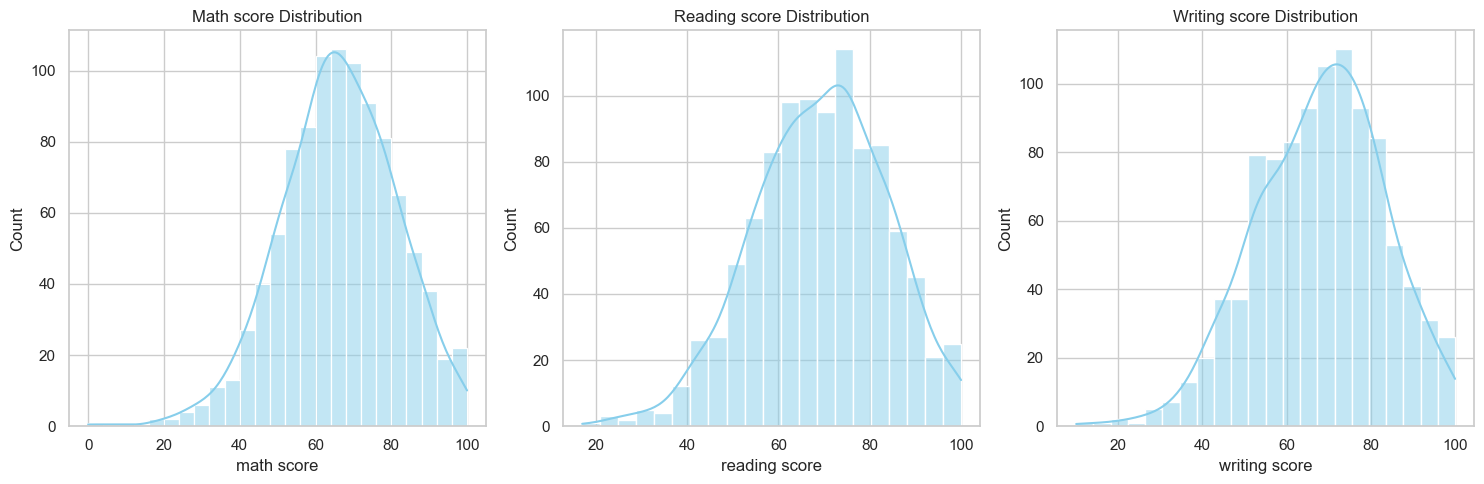

In [88]:
plt.figure(figsize=(15, 5))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[subject], kde=True, color='skyblue')
    plt.title(f'{subject.capitalize()} Distribution')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_18104\229291312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=df, palette='Set2')


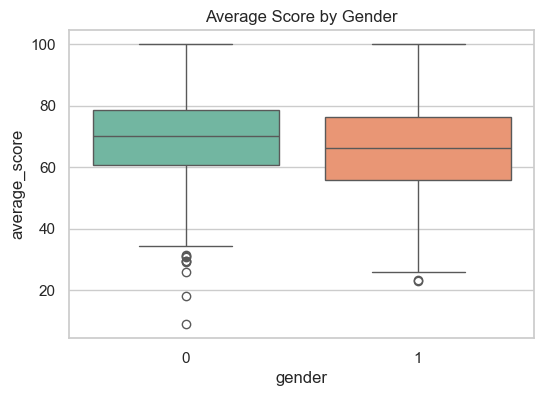

In [89]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='average_score', data=df, palette='Set2')
plt.title("Average Score by Gender")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18104\2848157921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='test preparation course', y='average_score', data=df, palette='Pastel1')


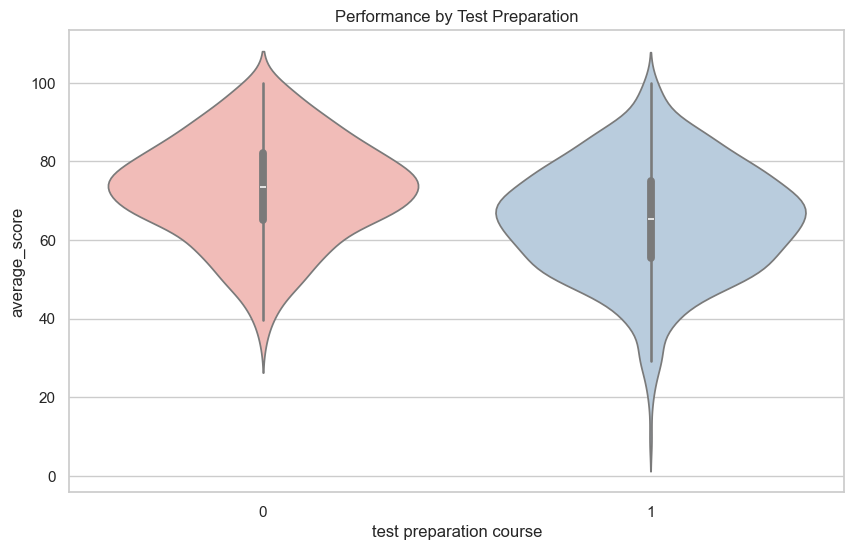

In [90]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='test preparation course', y='average_score', data=df, palette='Pastel1')
plt.title("Performance by Test Preparation")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18104\2561512892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='parental level of education', data=df, palette='coolwarm')


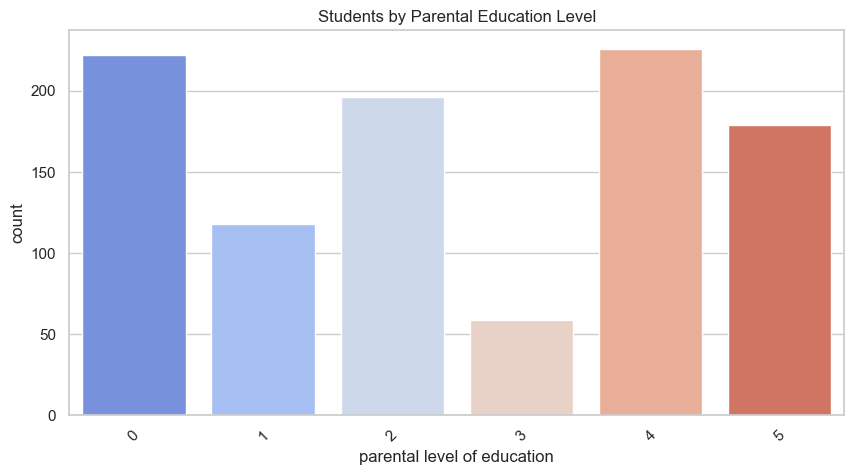

In [91]:
plt.figure(figsize=(10, 5))
sns.countplot(x='parental level of education', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Students by Parental Education Level")
plt.show()


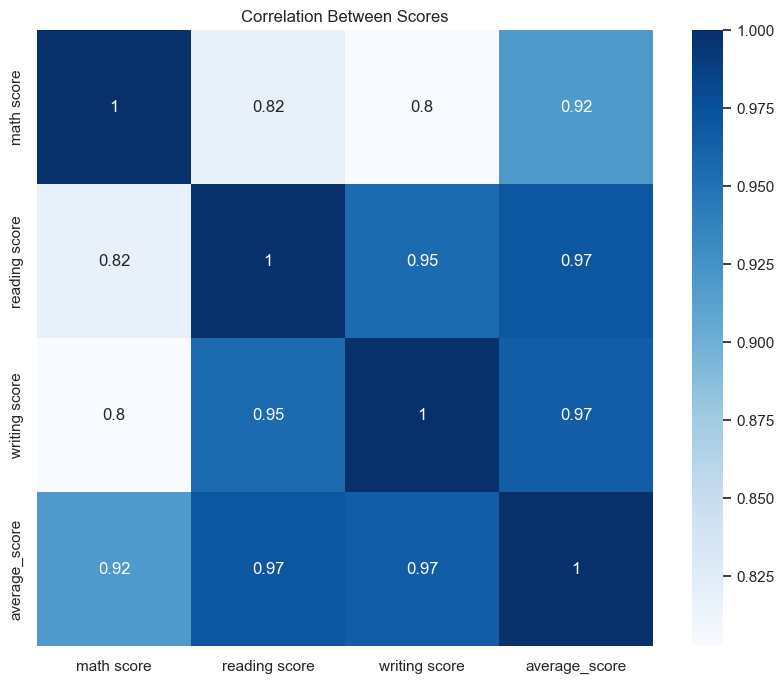

In [92]:
plt.figure(figsize=(10, 8))
corr = df[['math score', 'reading score', 'writing score', 'average_score']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', square=True)
plt.title("Correlation Between Scores")
plt.show()

In [93]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [94]:
y_pred = model.predict(X_test)

In [131]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.99      0.97      0.98       110

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



<h1>CONNECTING THE MODEL BY OLLAMA</h1>

In [120]:
def ask_ollama(prompt):
    try:
        response = requests.post(
            "http://localhost:11434/api/generate",
            json={
                "model": "llama3",  # Or any model you have installed
                "prompt": prompt,
                "stream": False
            }
        )
        return response.json().get("response", "[No response]")
    except Exception as e:
        return f"Ollama error: {e}"

In [123]:
sample_index = X_test.index[0]
sample_input = X_test.loc[sample_index]
sample_prediction = model.predict([sample_input])[0]

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [125]:
decoded = {col: label_encoders[col].inverse_transform([int(sample_input[col])])[0]
           for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']}

In [127]:
prompt = (
    f"A student is predicted to be a '{sample_prediction}' performer.\n"
    f"Details:\n"
    f"- Gender: {decoded['gender']}\n"
    f"- Ethnicity: {decoded['race/ethnicity']}\n"
    f"- Parental Education: {decoded['parental level of education']}\n"
    f"- Lunch: {decoded['lunch']}\n"
    f"- Test Preparation: {decoded['test preparation course']}\n"
    f"Suggest a personalized learning recommendation plan to help the student improve or maintain performance."
)


In [129]:
ai_feedback = ask_ollama(prompt)
print("\n Ollama Suggestion:")
print(ai_feedback)


 Ollama Suggestion:
Based on the provided details, I'll create a personalized learning recommendation plan to support the student in improving their performance.

**Goal:** Help the student improve their performance by 1-2 levels (from a predicted '0' performer).

**Recommendations:**

1. **Individualized Learning Plan**: Develop a tailored learning plan that focuses on the student's strengths, weaknesses, and interests. This will help her stay motivated and engaged.
	* Set specific, measurable, achievable, relevant, and time-bound (SMART) goals for each subject or skill area.
2. **Supplemental Test Preparation**: Provide resources and strategies to support test-taking skills, such as:
	+ Online practice quizzes or games (e.g., Khan Academy, Quizlet)
	+ Flashcards with key terms and concepts
	+ Study guides or note-taking templates for key subjects
3. **Math Support**: Offer additional math support, considering the student's predicted '0' performance in this area.
	* Provide online re

In [ ]:
SkillSense – AI-Based Personalized Curriculum and Skill Progress Tracker

Name: Supratik Boxi
Department: COMPUTER SCIENCE AND TECHNOLOGY
Semester: 6th
College: University of Engineering and Management, Kolkata

1. Objective:

The objective of this project is to improve student learning outcomes and career readiness at TransStadia Techno Campus by implementing an AI-based system. This system will monitor students' academic progress, identify individual strengths and weaknesses, and recommend personalized learning paths. It aims to provide each student with a guided, skill-based curriculum to enhance overall performance and employability.

2. Key Features:

1. Skill Progression Tracking:
An AI model will evaluate student performance data such as grades, quiz results, assignment scores, and time spent on various topics. It will track how students improve over time and help them identify both strong and weak areas. This can help in setting focused learning goals.

2. Personalized Curriculum Suggestions:
Based on the insights gathered, the AI system will generate recommendations for each student. If a student struggles in a topic, the model can suggest remedial videos or exercises. Conversely, students who perform well can be challenged with advanced content, making the learning process more engaging.

3. Simple and Quick-to-Build Model:
The backend logic will rely on basic data inputs like quiz scores, attendance, and topic-wise completion rate. A rule-based system or a simple Decision Tree classifier will be used to derive insights. These results will be displayed through a simple dashboard that shows skill graphs, alerts, and suggestions.

3. Benefits to TransStadia Techno Campus:

1. For Students:
They receive personalized recommendations, allowing them to focus on their weaknesses and advance quicker in their strengths. This helps them become job-ready and skill-certified.

2. For Faculty:
Faculty members can track student development through dashboards and intervene where required, providing better academic support and mentorship.

3. For Administration:
The campus administration will gain insights into the overall performance trends, helping in decisions about curriculum design, training programs, and resource allocation.

4. Tools & Technologies Used:

1. Python – Core programming language for logic and data processing.
2. pandas / scikit-learn – For managing student data and applying simple machine learning models.
3. Streamlit – To build a basic interactive web dashboard for tracking and feedback.
4. Excel / CSV – For storing and uploading student performance records.    i have also made a model on this by using the dataset named studentsperformance. the accuracy precisions are as follows : - Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.99      0.97      0.98       110          . i have also connected it to ollama and itrs showing the predictions based on the dataset that what are the possible ways to improve the learning through AI and get better results. so generate me a pdf of 2 page where all the things are mentioned.